# Impact of Model Complexity and Regularization on Model Generalization

## Abstract
This project investigates the relationship between model complexity, regularization, and generalization capabilities using both classification and regression tasks. The experiments explore the impact of polynomial data transformations and regularization techniques on \(E_{in}\) and \(E_{out}\). Insights are derived through structured experimentation and visualizations.

Key findings include the trade-offs between model complexity and generalization, and the effectiveness of regularization techniques in improving model robustness.


## Methodology

This project employs the following datasets and methods:

- **Datasets**: Classification and regression datasets provided for analysis.
- **Techniques**: Logistic regression, polynomial feature transformations, regularization methods like Ridge and Lasso, and cross-validation.
- **Tools**: Implemented using Python with libraries such as NumPy, scikit-learn, and Matplotlib for computation and visualization.
- **Evaluation Metrics**: Training error (Ein), validation error (Eval), and out-of-sample error (Eout) are used to evaluate model performance.

### Workflow Overview:
- **Step 1:** Data preprocessing and exploratory data analysis.
- **Step 2:** Applying transformations and training models for classification and regression.
- **Step 3:** Evaluating the impact of model complexity and regularization.
- **Step 4:** Cross-validation and comparative analysis of Ridge and Lasso regularization.

### Datasets Used:
- **Classification Dataset:** Features and target for binary classification.

In [ ]:
!pip install matplotlib numpy scikit-learn pandas

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
import pandas as pd

### Exploring Model Complexity: Logistic Regression

1. Train scikit-learn’s Logistic Regression algorithm using the Et2_Classification_TrainingData.csv dataset provided in the repository without adding extra features to those provided. 
2. Test the performance of your model using the Et2_Classification_TestData.csv dataset.
3. Observing the results
4. Now choose suitable new features and use these to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved.
5. Try a few different hand-crafted (i.e. no need to use functions to create the transformations) transformations with and without committing the sin of "data snooping" and note the differences.
6. We analyze the following aspects:
    - How do the found values for Ein and Eout for the various models relate to model complexity?
    - Explain how data transformations can lead to linear separability of a dataset.
    - Explain how data transformations effect the complexity of your model.

These functions are provided to assist you in Exploring Model Complexity: Logistic Regression

In [76]:
def plot_model_and_data(model, X_train, y_train):
    # Plot training data with different markers for each class
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', label='Class 1')
    plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='r', label='Class -1')
    plt.title('Training Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    # Plot decision boundaries
    plt.subplot(1, 2, 2)
    # Plot decision boundary
    x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
    y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired, levels=[-1, 0, 1])

    # Plot training data
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', label='Class 1')
    plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='r', label='Class -1')
    plt.title('Decision Boundaries with Training Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Investigating Logistic Regression Without Feature Engineering

### Objective
To evaluate the performance of logistic regression on raw data without feature engineering and understand its limitations.

### Methodology
- Train a logistic regression model on the provided training dataset.
- Evaluate the model's performance on the test dataset.
- Identify limitations and suggest feature transformations to improve classification performance.

In [ ]:
#load the training and testing data
train_data = pd.read_csv(r"./Et2_Classification_TrainingData.csv", header=None)
test_data = pd.read_csv(r"./Et2_Classification_TestData.csv", header = None)

# I want to rename the columns for a more intuitive notebook
train_data.rename(columns = {0:'feature1', 
                       1:'feature2', 2:'target'}, 
            inplace = True)

test_data.rename(columns = {0:'feature1', 
                       1:'feature2',
                       2:'target'}, 
            inplace = True)

In [78]:
train_data.head()

,feature1,feature2,target
0,0.654862,0.326862,1.0
1,0.910476,-0.076881,-1.0
2,-0.001699,-0.823829,1.0
3,0.445977,-0.670031,1.0
4,0.458449,0.576294,1.0


In [79]:
# Extract features and labels from the training dataset and testing dataset
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

In [80]:
#train the Logistic Regression model on the training dataset
LogisticRegressionmodel = LogisticRegression()
LogisticRegressionmodel.fit(X_train, y_train)

LogisticRegression()

## Training the model

In [81]:
score = LogisticRegressionmodel.score(X_test,y_test) #testing score
trainingScore = LogisticRegressionmodel.score(X_train,y_train) #training score

print("Ein = ", 1- trainingScore) #subtracted from 1 to calculate the error instead of accuracy (lower error is better!)
print("Eout = ", 1- score)

Ein =  0.5285714285714286
Eout =  0.6333333333333333


c:\Users\kaush\OneDrive\Documents\UL Code\e-tivity2\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


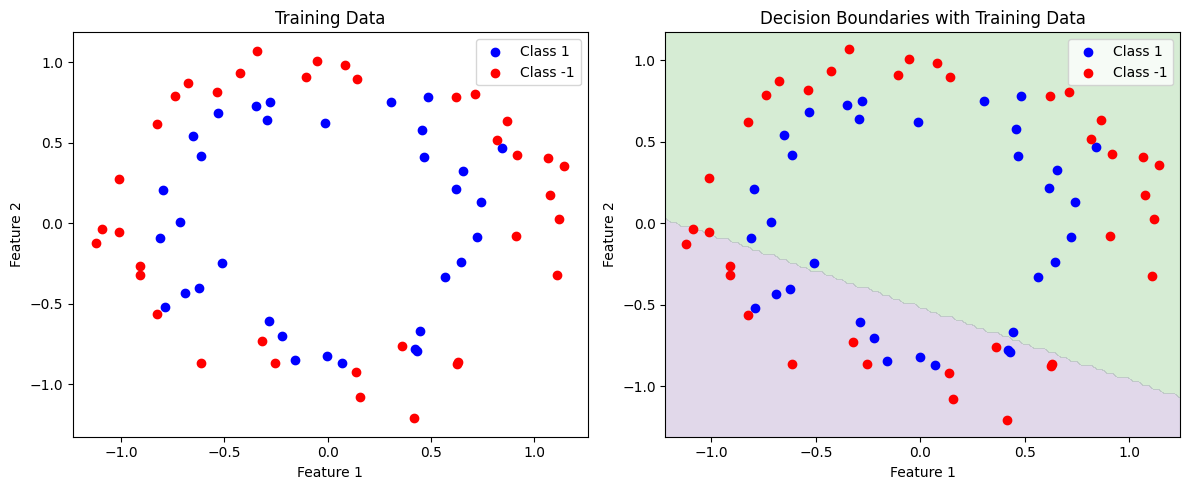

In [82]:
plot_model_and_data(LogisticRegressionmodel, X_train.values, y_train.values)

## Some analysis on why the model is perfoming bad

why these results seem disappointing?

After training the LogisticRegression model, we got Ein = 0.52 and Eout = 0.64  (These are quite high)

> As we can see from the plot of the dataset, the data points are not linearly separable. The logistic regression is trying to fit a linear decision boundry on a data that's not linearly separable. Therefore the Ein and Eout are poor.

## Creating new features

In [83]:
X_train['f1_squared'] = X_train['feature1']**2 #adding a feature as sqaure of f1   
X_train['f2_sqaured'] = X_train['feature2']**2 #adding a feature as sqaure of f2

X_test['f1_squared'] = X_test['feature1']**2 #adding a feature as sqaure of f1   
X_test['f2_sqaured'] = X_test['feature2']**2 #adding a feature as sqaure of f2

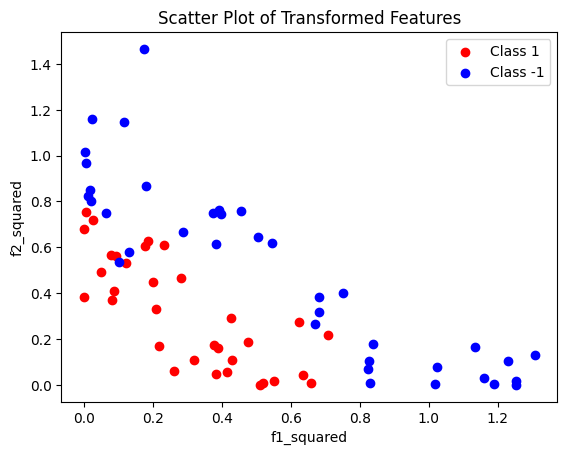

In [84]:
# Plot data points with y_train == 1 in red
plt.scatter(X_train[y_train==1]['f1_squared'], X_train[y_train==1]['f2_sqaured'], c='r', label='Class 1')

# Plot data points with y_train == -1 in blue
plt.scatter(X_train[y_train==-1]['f1_squared'], X_train[y_train==-1]['f2_sqaured'], c='b', label='Class -1')

# Add labels and legend
plt.xlabel('f1_squared')
plt.ylabel('f2_squared')
plt.title('Scatter Plot of Transformed Features')
plt.legend()
plt.show()

In [85]:
#fit the model
LGReg_newFeatures = LogisticRegression()
LGReg_newFeatures.fit(X_train, y_train)

LogisticRegression()

In [86]:
score = LGReg_newFeatures.score(X_test,y_test) #testing score
trainingScore = LGReg_newFeatures.score(X_train,y_train) # training score

print("Ein = ", 1- trainingScore)
print("Eout = ", 1- score)

Ein =  0.09999999999999998
Eout =  0.09999999999999998


In [87]:
X_train

,feature1,feature2,f1_squared,f2_sqaured
0,0.654862,0.326862,0.428844,0.106839
1,0.910476,-0.076881,0.828967,0.005911
2,-0.001699,-0.823829,0.000003,0.678694
3,0.445977,-0.670031,0.198896,0.448941
4,0.458449,0.576294,0.210175,0.332115
...,...,...,...,...
65,0.304020,0.750958,0.092428,0.563938
66,-0.908438,-0.265756,0.825259,0.070626
67,-0.738828,0.787035,0.545867,0.619424
68,0.841322,0.467849,0.707822,0.218883


### Why the performance has improved?

Both E_in and E_out are less then 1!!

As we can see from the plots above, the transformation of data by adding a new feature by just sqauring the original features, has made the data linearly separable.

## Hand-crafted transformations

### Trasnforming feature with data snooping

#### TRIAL 1: taking square root of sum of sqaures of features

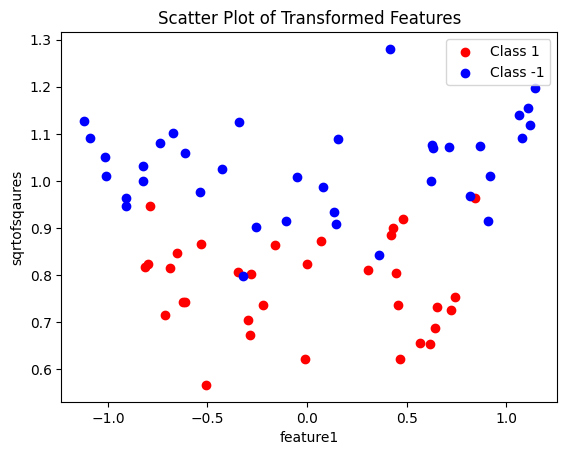

In [88]:
X_train['sqrtofsqaures'] = np.sqrt(X_train['feature1']**2 + X_train['feature2']**2)

X_test['sqrtofsqaures']=  np.sqrt(X_test['feature1']**2 + X_test['feature2']**2)


# Plot data points with y_train == 1 in red
plt.scatter(X_train[y_train==1]['feature1'], X_train[y_train==1]['sqrtofsqaures'], c='r', label='Class 1')

# Plot data points with y_train == -1 in blue
plt.scatter(X_train[y_train==-1]['feature1'], X_train[y_train==-1]['sqrtofsqaures'], c='b', label='Class -1')

# Add labels and legend
plt.xlabel('feature1')
plt.ylabel('sqrtofsqaures')
plt.title('Scatter Plot of Transformed Features')
plt.legend()
plt.show()


In [89]:
#fit the model
LGReg_newFeatures_v2 = LogisticRegression()
LGReg_newFeatures_v2.fit(X_train, y_train)

LogisticRegression()

In [90]:
score = LGReg_newFeatures_v2.score(X_test,y_test)
trainingScore = LGReg_newFeatures_v2.score(X_train,y_train)

print("Ein = ", 1- trainingScore)
print("Eout = ", 1- score)

Ein =  0.08571428571428574
Eout =  0.09999999999999998


### Transforming data without snooping

### TRIAL 1: Taking log of features

c:\Users\kaush\OneDrive\Documents\UL Code\e-tivity2\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


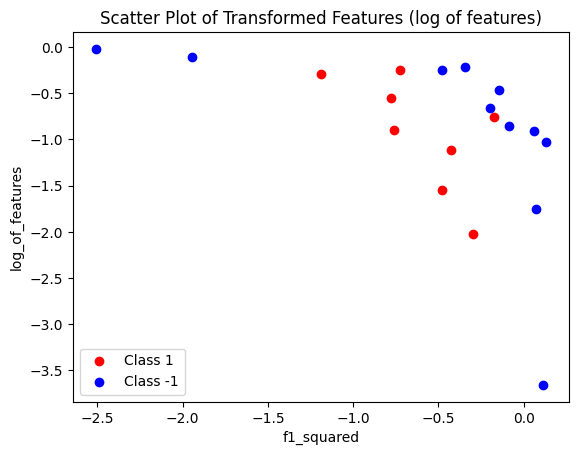

In [91]:
X_train_log = np.log(X_train[['feature1', 'feature2']])

# Plot data points with y_train == 1 in red
plt.scatter(X_train_log[y_train==1]['feature1'], X_train_log[y_train==1]['feature2'], c='r', label='Class 1')

# Plot data points with y_train == -1 in blue
plt.scatter(X_train_log[y_train==-1]['feature1'], X_train_log[y_train==-1]['feature2'], c='b', label='Class -1')

# Add labels and legend
plt.xlabel('f1_squared')
plt.ylabel('log_of_features')
plt.title('Scatter Plot of Transformed Features (log of features)')
plt.legend()
plt.show()

In [92]:
#removing NaN values
X_train_log['target'] = y_train
X_train_log.dropna(inplace=True)

y_Train_temp = X_train_log['target']
X_train_log.drop('target', axis=1, inplace=True)

#fit the model
LGReg_newFeatures_v2 = LogisticRegression()
LGReg_newFeatures_v2.fit(X_train_log, y_Train_temp)

LogisticRegression()

In [93]:
X_test_log = np.log(X_test[['feature1', 'feature2']])
X_test_log['target'] = y_test
X_test_log.dropna(inplace=True)

y_test_temp = X_test_log['target']
X_test_log.drop('target', axis=1, inplace=True)

score = LGReg_newFeatures_v2.score(X_test_log,y_test_temp)
trainingScore = LGReg_newFeatures_v2.score(X_train_log,y_Train_temp)

print("Ein = ", 1- trainingScore)
print("Eout = ", 1- score)

Ein =  0.4736842105263158
Eout =  0.6666666666666667


c:\Users\kaush\OneDrive\Documents\UL Code\e-tivity2\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


#### TRIAL 2: square product of difference

C:\Users\kaush\AppData\Local\Temp\ipykernel_28592\3865941808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_Xtrain['sqrt_product'] = np.square(temp_Xtrain['feature1']  - temp_Xtrain['feature2'])


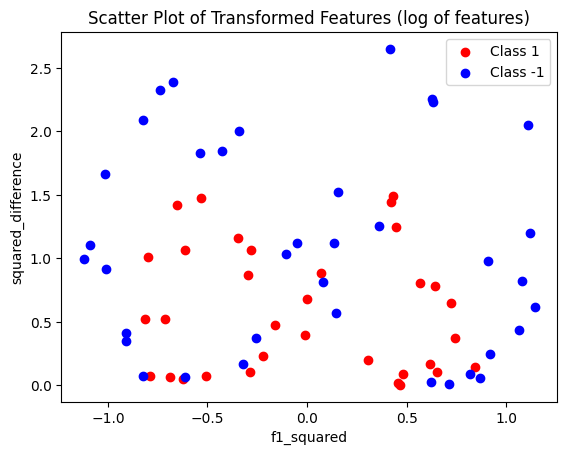

In [94]:
temp_Xtrain = X_train[['feature1', 'feature2']]

temp_Xtrain['sqrt_product'] = np.square(temp_Xtrain['feature1']  - temp_Xtrain['feature2'])


# Plot data points with y_train == 1 in red
plt.scatter(temp_Xtrain[y_train==1]['feature1'], temp_Xtrain[y_train==1]['sqrt_product'], c='r', label='Class 1')

# Plot data points with y_train == -1 in blue
plt.scatter(temp_Xtrain[y_train==-1]['feature1'], temp_Xtrain[y_train==-1]['sqrt_product'], c='b', label='Class -1')

# Add labels and legend
plt.xlabel('f1_squared')
plt.ylabel('squared_difference')
plt.title('Scatter Plot of Transformed Features (log of features)')
plt.legend()
plt.show()

In [95]:
#fit the model

LGReg_newFeatures_v2 = LogisticRegression()
LGReg_newFeatures_v2.fit(temp_Xtrain, y_train)

LogisticRegression()

In [96]:
temp_Xtest = X_test[['feature1', 'feature2']]
temp_Xtest['sqrt_product'] = np.square(temp_Xtest['feature1']  - temp_Xtest['feature2'])

score = LGReg_newFeatures_v2.score(temp_Xtest,y_test)
trainingScore = LGReg_newFeatures_v2.score(temp_Xtrain,y_train)

C:\Users\kaush\AppData\Local\Temp\ipykernel_28592\2976664309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_Xtest['sqrt_product'] = np.square(temp_Xtest['feature1']  - temp_Xtest['feature2'])


In [97]:
print("Ein = ", 1- trainingScore)
print("Eout = ", 1- score)

Ein =  0.3571428571428571
Eout =  0.5


This performance is expected as even though the transformation was applied without snooping, the data still was not linearly separable. I considered this example because we are not allowed to "look" at the data, but I still plotted to see the different.

## Reflection

- How do the found values for Ein and Eout for the various models relate to model complexity?
- Explain how data transformations can lead to linear separability of a dataset.
- Explain how data transformations effect the complexity of your model.

1. How do the found values for Ein and Eout for the various models relate to model complexity?

> As the complexity of model increases, the Ein (training error) decreases. This is because the model is able to fit the hypothesis more accurately and the hypothesis is able to "mend and bend" itself to fit the data points. This basically means that the model "overfits" the training data. Therefore, it may increases the Eout(testing error). The more complex the model is, the more probable for the model to get a bad generalization error. 

> Looking from the perspective of bais and variance, the complex models have higher variance and lower bias. They can fit the model better but Eout is worse. The opposite is true as well, the simpler model have high bais and lower variance and it can cause higher training errors but might have better performance on the testing data or the unseen data. There's a trade-off between both.

2. Explain how data transformations can lead to linear separability of a dataset.

> Our overall goal of fiting the model is to separate the datasets into desired number of classes. Sometimes, the data points of different classes are scattered in such a way that fitting a linear lines cannot separate them no matter how much we try. A great example in mentioned in this etivity - where the 1 class is closes to the origin in all directions and other class is farther away.

> We can use data transformation to manipulate the data points in such a way that the data becomes linearly separable. Applying transformation, like taking the square root for example or other non-linear operations, can create new features that can help us fit a linear decision bounderies. We are introducing additional dimensions to the data to try to linear separate them in higher dimensions. However, in that case, we also increase the dimensions of the decision boundry. For example in section 1.5 Trial 1, we can see that the points are fairly linearly separable in z dimension.

3. Explain how data transformations effect the complexity of your model.

> Data transformation introduces new features, i.e. we are altering the dimensions of overall feature space. The creation of new features makes the model more complex as we are adding new features. This can also lead to a higher VC dimension (dvc), therefore, we need more data samples to train the model. For example if we did data transformation and it resulted in 6 new features on top of initial 2, the dvc of the model is now 8 suggesting the incresae in model complexity.

In [98]:
def weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [99]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [100]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = linreg_predict(w,X)
    return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

In [101]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((X.reshape(len(X),1),np.array(extra)),1)

To prevent results due to luck, it is useful to repeat your experiments a good few times and look at average results. The below code snippet may be useful in this regard.

In [102]:
# Load the dataset
data = np.genfromtxt('Et2_Regression_Data.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

In [ ]:
error_in = []
error_out = []
repeats = 100
power_range = range(low_powers, high_powers) # it is up to you to decide on a suitable range

for power in power_range: 
    e_in=0
    e_out=0
    for r in range(repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=XX) ##Choose a suitable training_size XX
        X_train_trans = ## implement your data transformation 
        X_test_trans = ## implement your data transformation 
        w = weights(X_train_trans,y_train)
        e_in += calc_error(w,X_train_trans,y_train)
        e_out+= calc_error(w,X_test_trans,y_test)
    error_in.append(e_in/repeats)
    error_out.append(e_out/repeats)

# Effect of Regularization on Model Generalization

Below is an implementation of linear regression with regularization

In [104]:
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion 
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

This code snippet may be useful to keep track of Ein, Eout and the corresponding weights for various regulariser parameters

In [105]:
#load the regression data
data = np.genfromtxt(r'C:\Users\kaush\OneDrive\Documents\UL Code\e-tivity2\ET2_Regression_Data.csv', delimiter=',')
X = data[:, :-1]
X = X.reshape(-1)

y = data[:, -1]

## Regularization Analysis with Polynomial Features
Objectives:
- Use the transPoly function to transform the original feature space, generating polynomial features up to the 50th degree.

- Employ the weights_reg function to perform linear regression with regularization on the transformed dataset.

- Identify the optimal regularization parameter (𝜆) by experimenting with a range of values (up to 1000). Compare the out-of-sample error (𝐸𝑜𝑢𝑡) obtained with the optimal regularization parameter against the error obtained without regularization.

Text(0.5, 0, 'Lambda')

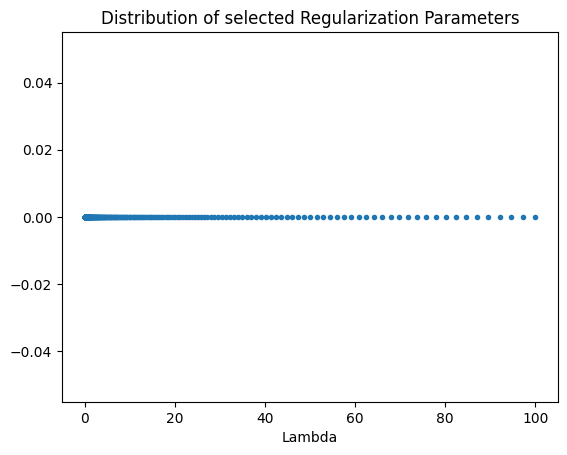

In [106]:
# Define lambdas
lambdas = np.logspace(start=np.log10(1e-10), stop=np.log10(100), num=1000, base=10.0)

plt.plot(lambdas, np.zeros(1000), ".")
plt.title("Distribution of selected Regularization Parameters")
plt.xlabel("Lambda")

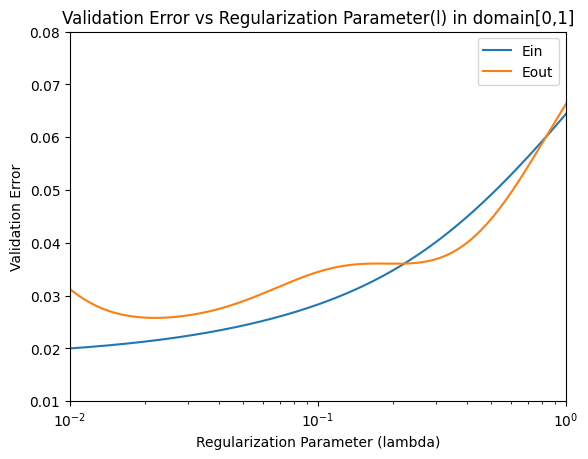

In [107]:
ein=[]
eout=[]
weights=[]
#lambdas = np.linspace(0.001, 1, num=1000)

X_trans = transPoly(X,50)

# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)

for l in lambdas:
    # Calculate weights using regularized linear regression    
    w = weights_reg(X_train,y_train,l)
    # Calculate training error (Ein)
    ein.append(calc_error(w,X_train,y_train))
    # Calculate validation error (Eval)
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)
    
# Plot validation error against regularization parameter
plt.plot(lambdas, ein, label='Ein')
plt.plot(lambdas, eout, label = 'Eout')
plt.ylim(0.01, 0.08)
plt.xlim(0.01, 1)
plt.xscale('log')
plt.xlabel('Regularization Parameter (lambda)')
plt.ylabel('Validation Error')
plt.legend()
plt.title('Validation Error vs Regularization Parameter(l) in domain[0,1]')
plt.show()

In [108]:
# Find the optimal regularization parameter that minimizes testing error
optimal_lambda = lambdas[np.argmin(eout)]

In [109]:
# Calculate Eout using the optimal regularization parameter
optimal_w = weights_reg(X_train, y_train, optimal_lambda)
eout_optimal = calc_error(optimal_w, X_test, y_test)

# Calculate Eout without regularization
w_no_reg = weights_reg(X_train, y_train, 0)  # No regularization (lambda=0)
eout_no_reg = calc_error(w_no_reg, X_test, y_test)

print("Optimal Regularization Parameter (lambda):", optimal_lambda)
print("Out-of-Sample Error (Eout) with optimal lambda:", eout_optimal)
print("Out-of-Sample Error (Eout) without regularization (lambda=0):", eout_no_reg)

Optimal Regularization Parameter (lambda): 0.02169383518385182
Out-of-Sample Error (Eout) with optimal lambda: 0.025764273034358975
Out-of-Sample Error (Eout) without regularization (lambda=0): 91547698.14010853


In [110]:
# Create and plot an Overfitted, underfitted and optimal model
overFittedModel = weights_reg(X_train, y_train, 0.00000001)
y_pred_overfitted = linreg_predict(overFittedModel,X_test)

optimalModel = weights_reg(X_train, y_train, optimal_lambda)
y_pred_optimal = linreg_predict(optimalModel,X_test)

underfittedModel = weights_reg(X_train, y_train, 10)
y_pred_underfitted = linreg_predict(underfittedModel,X_test)


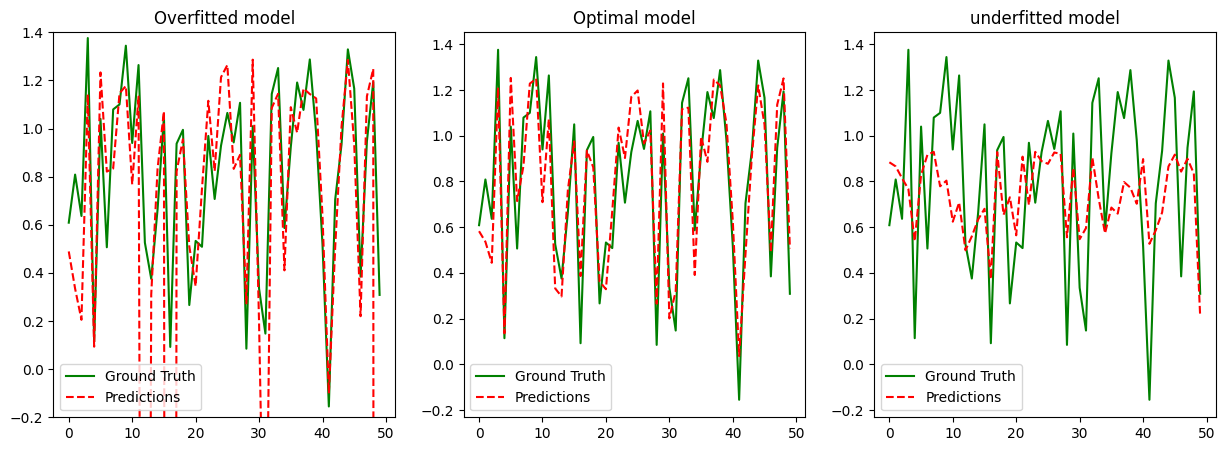

In [111]:
plt.figure(figsize=(15, 5))

#plot overfitted model
plt.subplot(1, 3, 1)
plt.plot(y_test, label='Ground Truth', linestyle='-', color='green')  # Plot true values
plt.plot(y_pred_overfitted, label='Predictions', linestyle='--', color='red')  # Plot predicted values

plt.title('Overfitted model')
plt.ylim(-0.2,1.4)
plt.legend()  

#plot optimal model
plt.subplot(1, 3, 2)
plt.plot(y_test, label='Ground Truth', linestyle='-', color='green')  # Plot true values
plt.plot(y_pred_optimal, label='Predictions', linestyle='--', color='red')  # Plot predicted values

plt.title('Optimal model')
plt.legend() 

#plot underfitted model
plt.subplot(1, 3, 3)
plt.plot(y_test, label='Ground Truth', linestyle='-', color='green')  # Plot true values
plt.plot(y_pred_underfitted, label='Predictions', linestyle='--', color='red')  # Plot predicted values

plt.title('underfitted model')
plt.legend() 

## Reflection

- Interpret the information in the requested figures.
- Explain the strategy chosen to decide on the optimum amount of regularisation.
- Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.

#### Interpretting the infromation in the figures above:

In the figures above we can clearly see three different models with an overfitted hypothesis, optimal hypothesis and an underfitted hypothesis. 
1. We can see that the overfitted model tries to fit every single data point, getting impacted by the noise in the data. It mimics the ground truth very closely.
2. The figure in the middle demonstrate the optimal model, with a good balance between under and over fitting. It still captures the but doesn't get too much distracted by the noise. Since the optimal lambda is very close to the overfitted model's lambda, the graphs have very little difference in them.
3. The right most model shows the underfitted model, and it completely fails to capture the function and it's too rigid and unable to capture the data.

#### Strategy to decide on the optimum amout of regularization
I evaluated the model's performance on test dataset but training the model on train data with 1000 different lambdas (regularization parameter). The regularization parameter l controls the trade-off between fitting the training data and penalizing large coefficients. It helps prevent overfitting by discouraging overly complex models. By plotting the testing error against different values of l, we can observe how the model's performance changes with varying levels of regularization. The optimal amount of regularization is typically the value of l that minimizes the testing error. I simply used argmin functionality of the numpy library to find out the index of min error from the stored list of eout and then used that index to find the optimal lambda.

#### Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.

In the regularized regression problem, the term l*np.identity(m.shape[0]) is added to the diagonal of the matrix m (which represents the dot product of the feature matrix with its transpose). It adds a penalty term to the large weights in the model to prevent overfitting. Let's look at the equation for Eout w.r.t the in-sample error and regulationzation. 

$E_{out} = E_{in} + \lambda . w^Tw$

The term $\lambda . w^Tw$ is calculated using l*np.identity(m.shape[0])

# K-Fold Cross-Validation for Regularization

> We don't want to select lambdas evenly as we want to explore more lambdas in 0 to 1 range and try few for experimentation in range > 10. So we took logspace instead of linespace for lambda distribution during selection

In [112]:
number_of_splits = 10

# Perform 10-fold cross-validation
kf = KFold(n_splits=number_of_splits, shuffle=True, random_state=42)

# Initialize lists to store results
cv_errors = []
Evals = []

# Iterate over lambdas
for l in lambdas:
    cv_error_sum = 0
    eout_sum = 0
    
    # Perform cross-validation
    for train_index, test_index in kf.split(X_trans):
        X_train_CV, X_test_CV = X_trans[train_index], X_trans[test_index]
        y_train_CV, y_test_CV = y[train_index], y[test_index]
        
        # Fit model
        w = weights_reg(X_train_CV, y_train_CV, l)
        
        # Calculate training error (Ein)
        ein = calc_error(w, X_train_CV, y_train_CV)
        
        # Calculate testing error (Eout)
        eout = calc_error(w, X_test_CV, y_test_CV)
        
        #store the errors for analysis
        cv_error_sum += ein
        eout_sum += eout
        
    cv_errors.append(cv_error_sum / number_of_splits)  # Average cross-validation error
    Evals.append(eout_sum / number_of_splits)  # Average testing error

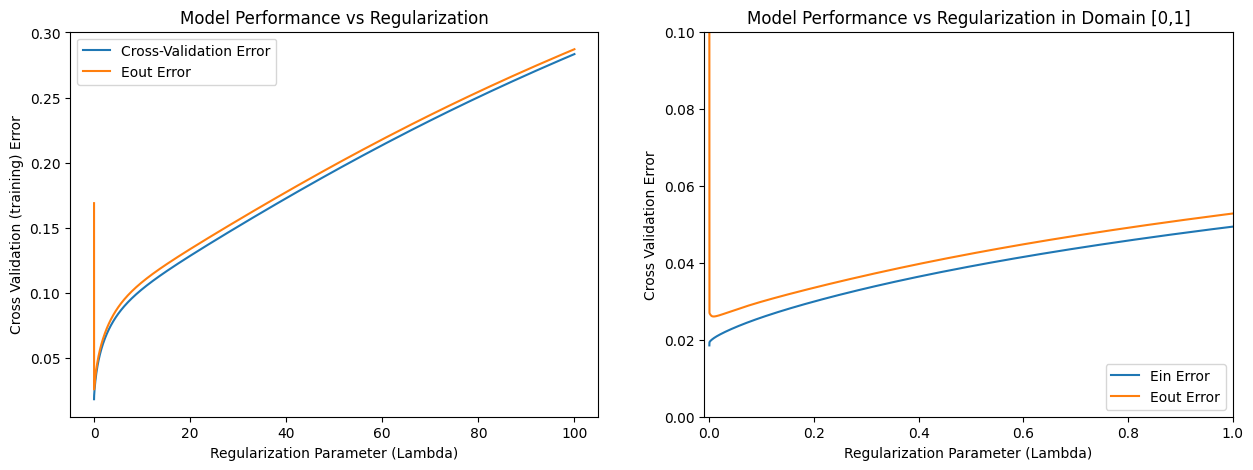

In [113]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
# Plot model performance vs lambda
plt.plot(lambdas, cv_errors, label='Cross-Validation Error')
plt.plot(lambdas, Evals, label='Eout Error')
plt.xlabel('Regularization Parameter (Lambda)')
plt.ylabel('Cross Validation Error')
plt.title('Model Performance vs Regularization')
plt.legend()

#plot overfitted model
plt.subplot(1, 2, 2)
# Plot model performance vs lambda
plt.plot(lambdas, cv_errors, label='Ein Error')
plt.plot(lambdas, Evals, label='Eout Error')
plt.xlabel('Regularization Parameter (Lambda)')
plt.ylabel('Cross Validation Error')
plt.ylim(-0.00001,0.10)
plt.xlim( -0.01, 1)
plt.title('Model Performance vs Regularization in Domain [0,1]')
plt.legend(loc='lower right')
plt.show()

This is an expected behaviour. Since our optimal lambda is very close to 0 ( i.e. 0.02), we get a sudden decline from 0 to 0.2 in error. In this stage, the model is improving and it's able to generalize well on the out-of-sample error. But with increase in the lambda after the optimal, the model starts to underfit and error starts to increase.

In [114]:
# Find the optimal regularization parameter that minimizes testing error
optimal_lambda_withCV = lambdas[np.argmin(Evals)]

# Calculate Eout using the optimal regularization parameter
optimal_w = weights_reg(X_train, y_train, optimal_lambda_withCV)
eout_optimal_cv = calc_error(optimal_w, X_test, y_test)

# Calculate Eout without regularization
w_no_reg = weights_reg(X_train, y_train, 0)  # No regularization (lambda=0)
eout_no_reg = calc_error(w_no_reg, X_test, y_test)

print("Optimal Regularization Parameter (lambda) with K-Fold CV:", optimal_lambda_withCV)
print("Optimal Regularization Parameter (lambda) without K-Fold CV:", optimal_lambda)
print("-------------------------------------------")
print("Out-of-Sample Error (Eout) with optimal lambda from CV:", eout_optimal)
print("Out-of-Sample Error (Eout) with optimal lambda without CV:", eout_optimal_cv)
print("------------------------------------------------------")
print("Out-of-Sample Error (Eout) without regularization (lambda=0):", eout_no_reg)

Optimal Regularization Parameter (lambda) with K-Fold CV: 0.008239785684528511
Optimal Regularization Parameter (lambda) without K-Fold CV: 0.02169383518385182
-------------------------------------------
Out-of-Sample Error (Eout) with optimal lambda from CV: 0.025764273034358975
Out-of-Sample Error (Eout) with optimal lambda without CV: 0.03498768397723012
------------------------------------------------------
Out-of-Sample Error (Eout) without regularization (lambda=0): 91547698.14010853


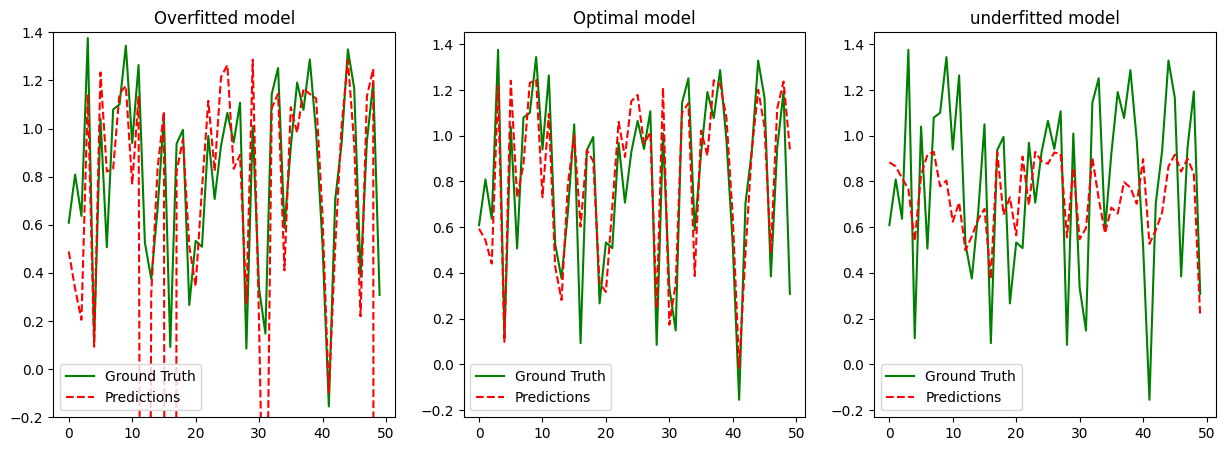

In [115]:
# Create and plot an Overfitted, underfitted and optimal model
overFittedModel = weights_reg(X_train, y_train, 0.00000001)
y_pred_overfitted = linreg_predict(overFittedModel,X_test)

optimalModel = weights_reg(X_train, y_train, optimal_lambda_withCV)
y_pred_optimal = linreg_predict(optimalModel,X_test)

underfittedModel = weights_reg(X_train, y_train, 10)
y_pred_underfitted = linreg_predict(underfittedModel,X_test)

plt.figure(figsize=(15, 5))

#plot overfitted model
plt.subplot(1, 3, 1)
plt.plot(y_test, label='Ground Truth', linestyle='-', color='green')  # Plot true values
plt.plot(y_pred_overfitted, label='Predictions', linestyle='--', color='red')  # Plot predicted values

plt.title('Overfitted model')
plt.ylim(-0.2,1.4)
plt.legend()  

#plot optimal model
plt.subplot(1, 3, 2)
plt.plot(y_test, label='Ground Truth', linestyle='-', color='green')  # Plot true values
plt.plot(y_pred_optimal, label='Predictions', linestyle='--', color='red')  # Plot predicted values

plt.title('Optimal model')
plt.legend() 

#plot underfitted model
plt.subplot(1, 3, 3)
plt.plot(y_test, label='Ground Truth', linestyle='-', color='green')  # Plot true values
plt.plot(y_pred_underfitted, label='Predictions', linestyle='--', color='red')  # Plot predicted values

plt.title('underfitted model')
plt.legend() 
plt.show()

## Reflection

In this code, I've updated the analysis to use 10-fold cross-validation for evaluating model performance. Here's the procedure followed using KFOLD and the rationale behind the choice of parameters:

1. K-Fold Parameters: I have split the dataset into 10 equal part samples and used 9 parts to train and 1 part to validate. All the 10 parts are in the training sample as we rotate through the splits created by k-fold and all the 10 parts are used in validation.

2. Averaging: Once the we rotate through the 10 splits created for training and validation, we average the errors for all the 10 splits for each Lambda and store it in cv_errors (training errors) and Evals (validation error). 

3. Once we average out the Evals, we plot them againts the lambdas that was used to generate the model which gave that particular out of sample error (validation error in these cases).

Each split of "fold" is used for the training and each one is used for validation in an iterative process. Hence we can use N data points for training and Validation. Hence, we get a more reliable estimate of model performance.

# RidgeCV and LassoCV to obtain the optimum regularisation

In [ ]:
lambdas = np.logspace(start=np.log10(1e-10), stop=np.log10(100), num=1000, base=10.0)

# Perform RidgeCV
ridge_cv = RidgeCV(alphas=lambdas, cv=10)
ridge_cv.fit(X_train, y_train)

# Obtain optimal alpha and corresponding error
optimal_alpha_ridge = ridge_cv.alpha_
ridge_w = weights_reg(X_train,y_train,optimal_alpha_ridge)
ridge_Ein = calc_error(ridge_w,X_train,y_train)
ridge_Eout = calc_error(ridge_w, X_test, y_test)

# Perform LassoCV
lasso_cv = LassoCV(alphas=lambdas, cv=10)
lasso_cv.fit(X_train, y_train)

# Obtain optimal alpha and corresponding error
optimal_alpha_lasso = lasso_cv.alpha_
lasso_w = weights_reg(X_train,y_train,optimal_alpha_lasso)
lasso_Ein = calc_error(lasso_w,X_train,y_train)
lasso_Eout = calc_error(lasso_w, X_test, y_test)

In [117]:
# Compare results with previous results (if available)
print("RidgeCV:")
print("Optimal Regularization Parameter (alpha):", optimal_alpha_ridge)
print("Out-of-Sample Error (Eout):", ridge_Eout)
print("\nLassoCV:")
print("Optimal Regularization Parameter (alpha):", optimal_alpha_lasso)
print("Out-of-Sample Error (Eout):", lasso_Eout)

RidgeCV:
Optimal Regularization Parameter (alpha): 0.01645190587753661
Out-of-Sample Error (Eout): 0.02631605516135254

LassoCV:
Optimal Regularization Parameter (alpha): 0.0005043159487171359
Out-of-Sample Error (Eout): 0.13570969321682305


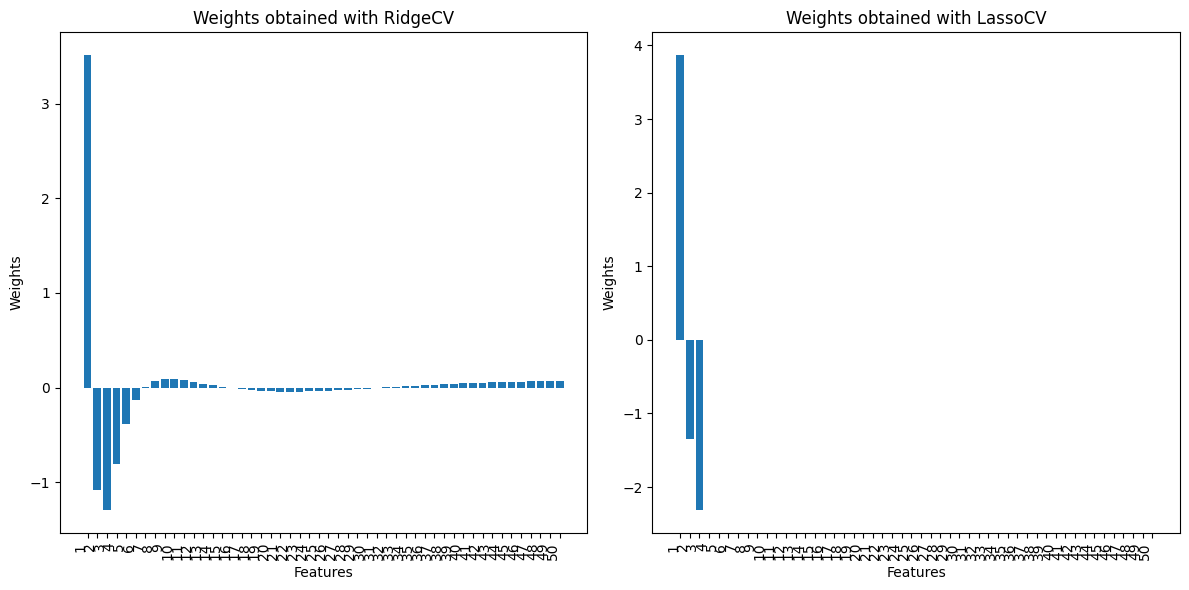

In [123]:

# Extract feature names
feature_names = [f'{i+1}' for i in range(len(ridge_cv.coef_))]

# Create subplots for RidgeCV and LassoCV weights
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot RidgeCV weights
ax1.bar(feature_names, ridge_cv.coef_)
ax1.set_title('Weights obtained with RidgeCV')
ax1.set_xlabel('Features')
ax1.set_ylabel('Weights')

# Plot LassoCV weights
ax2.bar(feature_names, lasso_cv.coef_)
ax2.set_title('Weights obtained with LassoCV')
ax2.set_xlabel('Features')
ax2.set_ylabel('Weights')

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=90, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=90, ha='right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Here we can clearly see that RidgeCV tends to distribute the weights across all features, even if the weights are small. While, LassoCV tends to result in reduced weights, effectively selecting a subset of features while setting the coefficients of irrelevant features to zero.

## Reflection

- Observe the resulting error and l (lambda), and compare these to previous results. What do you see? Is this what you expected?
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

#### Comparision of the error and lambda:

|Metrics |	K-Fold CV|	Without CV|	RidgeCV|	LassoCV |
|---------|-----------|------------|--------|------------------|
|Optimal Regularization Parameter (lambda/alpha)	|0.008239785684528511	|0.02169383518385182	|0.01645190587753661	|0.0005043159487171359|
|Out-of-Sample Error (Eout)	|0.025764273034358975	|0.03498768397723012	|0.02631605516135254	|0.13570969321682305|

Observations:

- The optimal regularization parameter (lambda/alpha) obtained with K-Fold CV is lower than that obtained without CV, indicating that K-Fold CV selects a less complex model.
- The out-of-sample error (Eout) with the optimal regularization parameter from K-Fold CV is lower than that without CV, suggesting that K-Fold CV provides a more accurate estimate of model performance.
- The out-of-sample error with RidgeCV is comparable to that obtained with K-Fold CV, indicating that Ridge regression effectively regularizes the model.
- The out-of-sample error with LassoCV is higher than that obtained with RidgeCV, suggesting that Lasso regression might be too aggressive in feature selection, resulting in underfitting.

This was expected result, as we know that regularization provides more "optimal" estimate of the hypotheses rather than a bais one.

### Comparision of Ridge vs Lasso Cross validation

RidgeCV typically allocates weights to all features, even those with small magnitudes. In contrast, LassoCV often leads to diminished weights, effectively identifying a subset of features while nullifying (if this is word :P) coefficients associated with irrelevant ones. This observation aligns with the inherent traits of both regularization methodologies. RidgeCV tends to generate more uniform weights, whereas LassoCV yields sparser weights.

Source: https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

## Summary of Results

- **Logistic Regression:** Adding polynomial features significantly improved classification accuracy by enhancing linear separability, while regularization controlled overfitting.
- **Regression Analysis:** Optimal polynomial degree and regularization parameter minimized \(E_{out}\), highlighting the trade-off between model complexity and generalization.
- **Cross-Validation:** Demonstrated the reliability of model performance metrics across folds.
- **Ridge vs. Lasso:** Ridge regression produced smoother weight distributions, while Lasso facilitated feature selection.